In [36]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Missing values
## Since there are some missing values so we will check it using seaborn

In [16]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

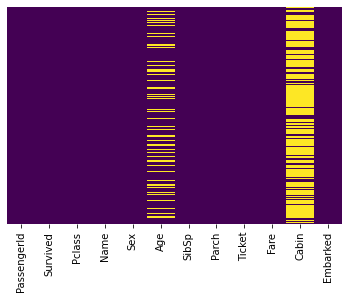

In [21]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

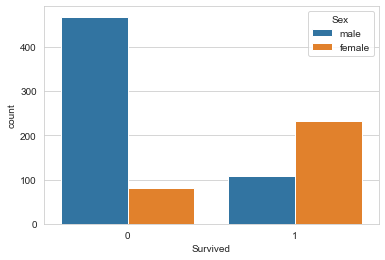

In [29]:
## Now we will use seaborn to check people that survived.
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

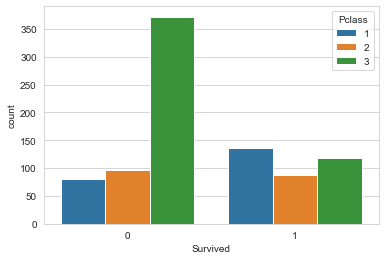

In [30]:
sns.countplot(x='Survived', hue='Pclass', data=train)

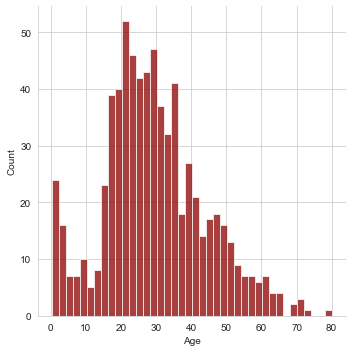

In [32]:
## Plotting the distribution of people age
## dropna() is used to drop the null values present inside the Age column
sns.displot(train['Age'].dropna(), kde=False, color='darkred', bins=40)

<AxesSubplot:>

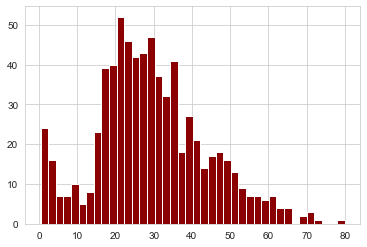

In [33]:
## Distribution using matplotlib histogram
train['Age'].hist(color='darkred', bins=40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

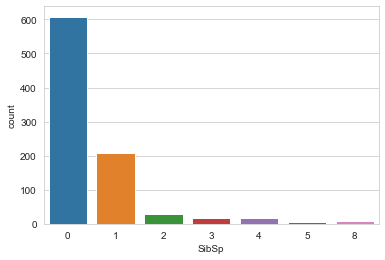

In [39]:
## Additional information of passengers using countplot
sns.countplot(x='SibSp', data=train)

In [35]:
# Data Cleaning

In [40]:
## Since theere are some missing values in Age and Cabin, so I'll fill the age Null values with the average values according to the passenger class.
## Also dropping Cabin column because it has so many missing values and feature engineering is required to fill the null values.

In [41]:
train.drop('Cabin', axis=1, inplace=True)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

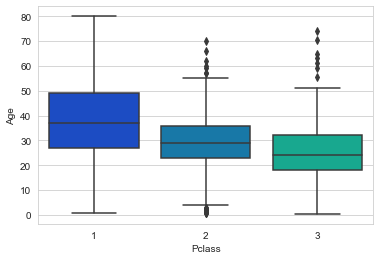

In [44]:
## Creating a function to fill the null values in Age column.
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

In [47]:
def impute_age(columns):
    Age = columns[0]
    Pclass = columns[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [48]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

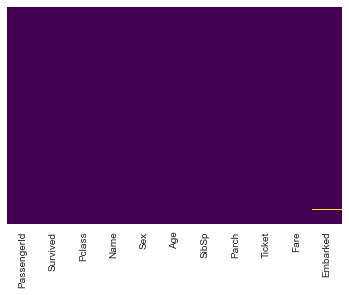

In [51]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [55]:
## Dropping the row in Embarked which is NaN
train.dropna(inplace=True)

<AxesSubplot:>

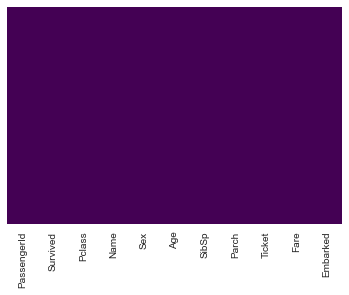

In [56]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [57]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [58]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [59]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [60]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [61]:
# Logistic regression

In [62]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [63]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [67]:
# Training the model and Prediction

In [69]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [70]:
predictions = logmodel.predict(X_test)

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
accuracy=confusion_matrix(y_test,predictions)

In [73]:
accuracy

array([[142,  21],
       [ 53,  51]], dtype=int64)

In [74]:
from sklearn.metrics import accuracy_score

In [75]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7228464419475655

In [76]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [77]:
# Evaluation of model

In [78]:
from sklearn.metrics import classification_report

In [79]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79       163
           1       0.71      0.49      0.58       104

    accuracy                           0.72       267
   macro avg       0.72      0.68      0.69       267
weighted avg       0.72      0.72      0.71       267

